C:\Users\brind\AppData\Local\Temp\ipykernel_46100\827911977.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(chosen_colormap, num_plots)


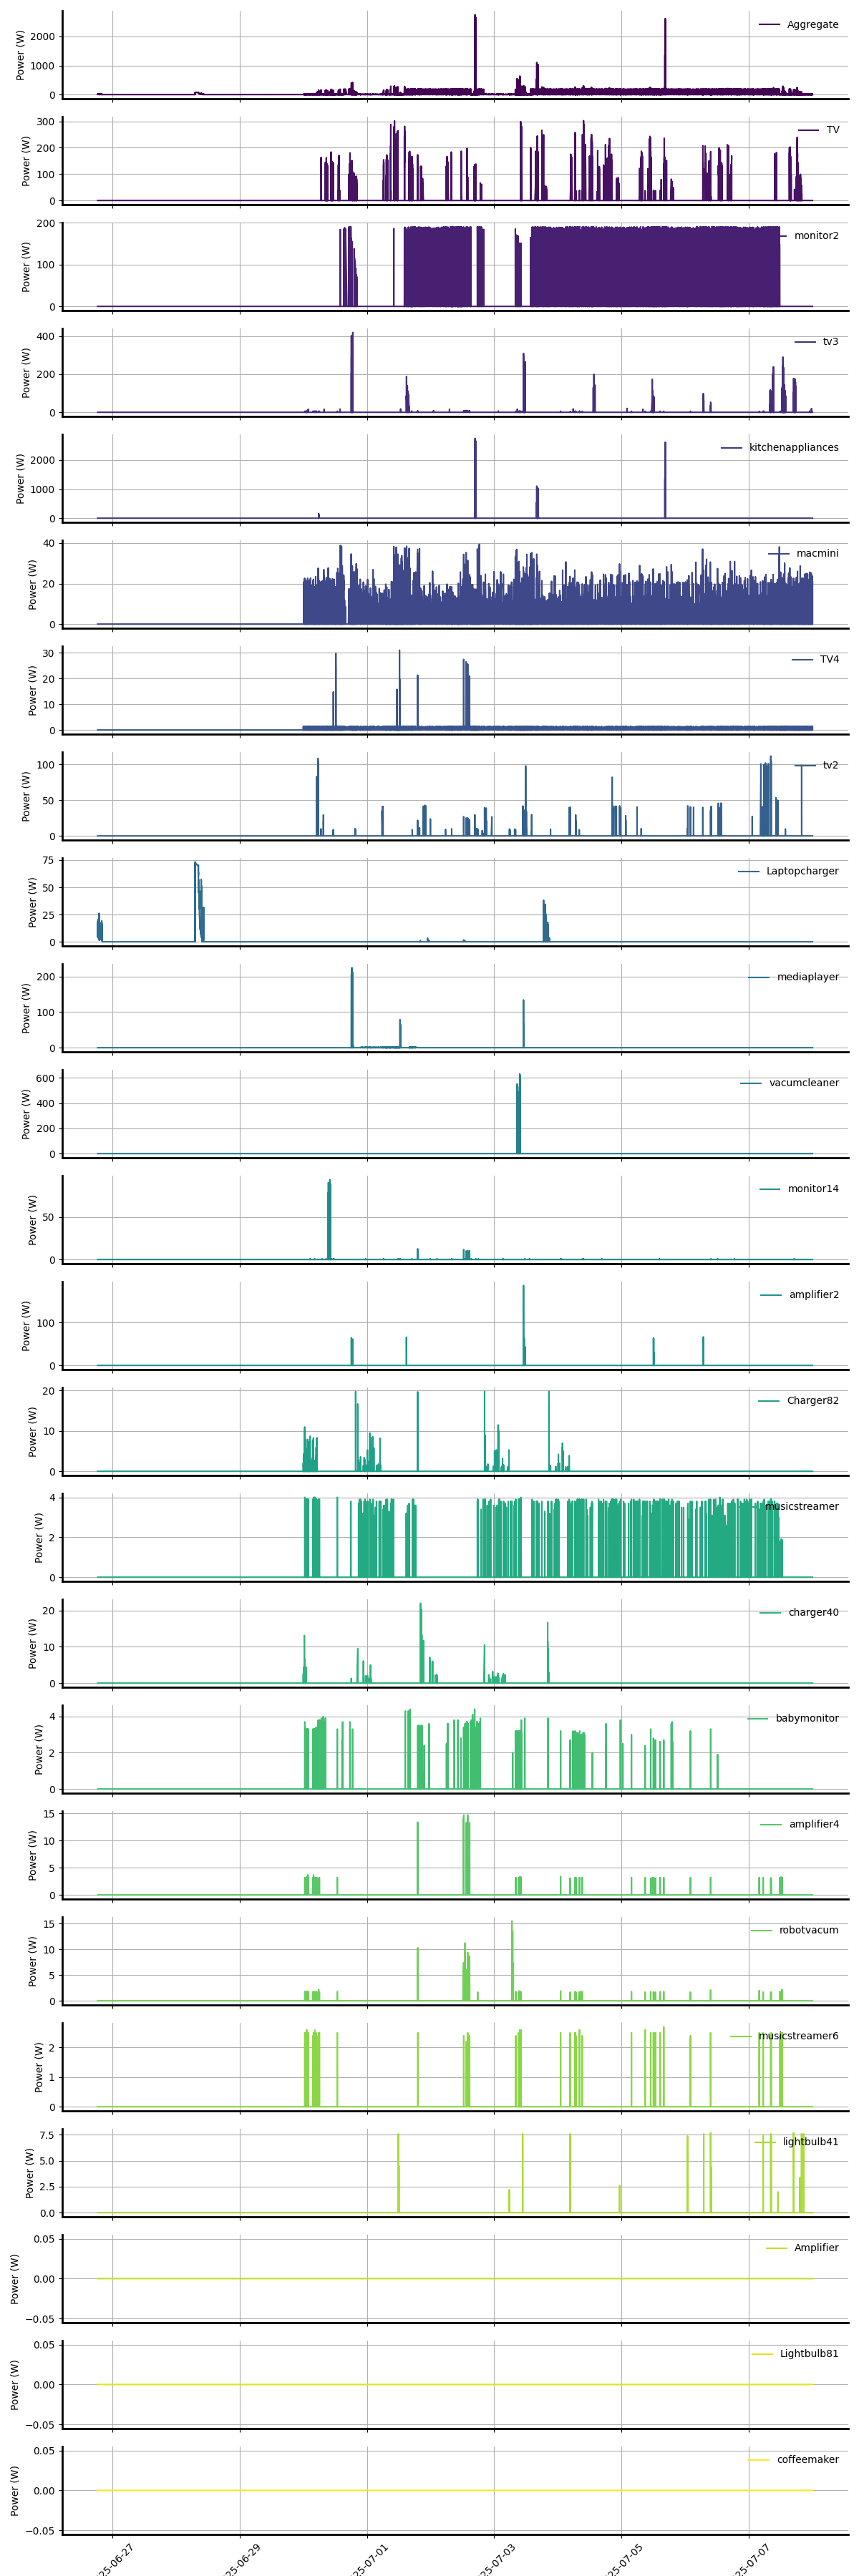

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle

# --- Load saved data ---
with open("power_data.pkl", "rb") as f:
    data = pickle.load(f)

df_pivot = data["df_pivot"]
ordered_devices = data["ordered_devices"]

# --- Plot ---
num_plots = len(ordered_devices)
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 1.5 * num_plots), sharex=True)

chosen_colormap = "viridis"
cmap = cm.get_cmap(chosen_colormap, num_plots)
colors = [cmap(i) for i in range(num_plots)]

for ax, col, color in zip(axes, ordered_devices, colors):
    ax.plot(df_pivot.index, df_pivot[col], label=col, color=color, linewidth=1.5)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for spine in ax.spines.values():
        spine.set_linewidth(2)

    ax.legend(loc="upper right", frameon=False)
    ax.set_ylabel("Power (W)")
    ax.grid(True)

plt.xlabel("Timestamp")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()